## Predict Cancellation for Hotel/Resorts

#### Dataset description

It contains booking data (31 variables) on two hotels in Portugal:

- **H1:** a resort hotel at the Algarve (40,060 observations)
- **H2:** a city hotel in Lisbon(79,330 observations)

Each observation represents a hotel booking (due to arrive between the July 1, 2015 and the August 31, 2017), including **bookings that effectively arrived and bookings that were canceled.**

The data is from real hotel bookings, but all data pertaining to hotel or costumer identification were deleted.

#### Complete list of variables

You can see the complete list of variables and their definations [here](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

#### Important Data Science questions

1. **Core Business Problem:-** Revenue Management, cost implications due to cancellations.

2. **Stakeholders:-** Hotel Booking Manager/Receptionist

3. **Data Science Problem:-** Determine if a booking will be canceled or not. And what leads to cancellations.

4. **Business Metric:-** Cancellation rate < 10%

5. **Data Science Metric:-** TBD

6. **Important EDA Questions:-** Done 

7. **Simple Modeling:-** Done

8. **Feature Selection:-** Done

9. **Feature Engineering:-** Done 

## Data Aquisition

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
## reading the data from directory

for dirname, _, filenames in os.walk('../Assignment3-Hotel Booking/'):
    for filename in filenames:
        if('.csv' in filename):
            print(os.path.join(dirname, filename))
            

../Assignment3-Hotel Booking/data\hotel_bookings.csv


In [3]:
data = pd.read_csv(os.path.join(dirname, filename))
data.shape

(119390, 32)

In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data types:**

- `Categorical` - hotel, is_canceled, customer_type, is_repeated_guest, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, reservation_status


- `Numerical` - lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, previous_bookings_not_canceled, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests


- `Ordinal` - arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, reservation_status_date

**Missing values:**

- country
- agent
- company
- children

In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


- The following columns previous_cancellations, previous_bookings_not_canceled, booking_changes days_in_waiting_list, required_car_parking_spaces, total_of_special_requests have only a maximum value. This shows that these features contribute to the decision of cancellation only in very few cases

**Assumptions about impact of features:**

- High: hotel, lead_time, arrival_date_year, arrival_date_month, stays_in_weekend_nights, stays_in_week_nights, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, deposit_type, days_in_waiting_list, customer_type


- Medium: children, babies, distribution_channel, booking_changes, adr


- Low: arrival_date_week_number, arrival_date_day_of_month,country, meal, adults, market_segment, agent, company, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date

**Assumptions about cancellation:**

1. The type of hotel decides the cancellation rate with higher cancellations in city hotels as compared to resort hotels due to variety of facilities available in resort hotels.
2. The earlier the booking made, higher the chances of cancellation.
3. Customers who have bookings for longer durations have lesser chance of cancelling their booking.
4. As more children or babies are involved in the booking, higher chances of cancellation.
5. Old guest (is_repeated_guest=1) is less likely to cancel current booking.
6. If there are high previous cancellations, possibility of cancellation of current booking is also high.
7. If room assigned is not the same as reserved room type, customer might positively cancel the booking.
8. Higher the number of changes made to the booking, lesser is the chance of cancellation due to the investment of time in curating the booking as per one's requirement.
9. Bookings that are refundable or for which deposits were not made at the time of booking stand a high chance of cancellation.
10. If the number of days in waiting list is significant, customer might make some other booking due to uncertainty of confirmation of current booking.

**Target variable:** 

- is_canceled

**Cancellation Prediction:**

Wo what do we want to predict?

- the number of cancellations over time
- whether or not a given booking will be canceled
- how likely it is that a given booking will be canceled

## Exploratory Data Analysis

### Univariate Analysis (Checking the validity of assumptions)

Percentage cancelation=  0.37041628277075134
Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: reservation_status, dtype: float64


Text(0.5, 1.0, 'Reservation status VS Cancellations')

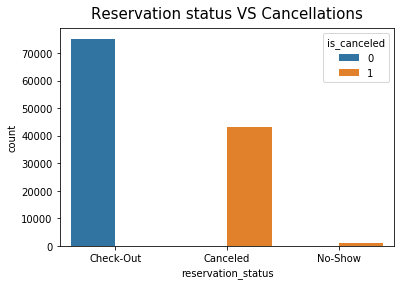

In [7]:
is_can = len(data[data['is_canceled'] == 1])

print("Percentage cancelation= ", is_can / len(data))
cancellation_types = data['reservation_status'].value_counts(normalize = True) * 100
print(cancellation_types)

sns.countplot(data = data, x = 'reservation_status', hue = 'is_canceled')
plt.title("Reservation status VS Cancellations", fontsize = 15, pad = 10)

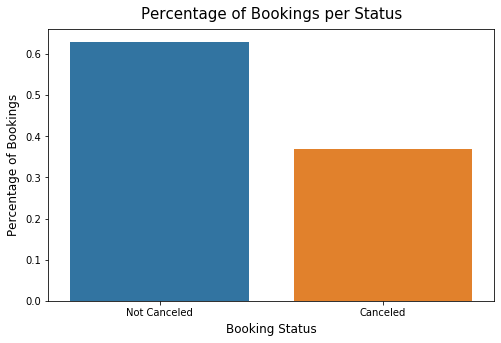

In [8]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Bookings per Status", fontsize = 15, pad = 10)
sns.barplot(x=data['is_canceled'].unique(), y=data['is_canceled'].value_counts(normalize=True))
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);
plt.savefig('../Assignment3-Hotel Booking/assets/percentage_booking_per_status.png')

In [9]:
corr= data.corr(method = 'pearson')['is_canceled'][1:]
corr.sort_values(ascending = False)

lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

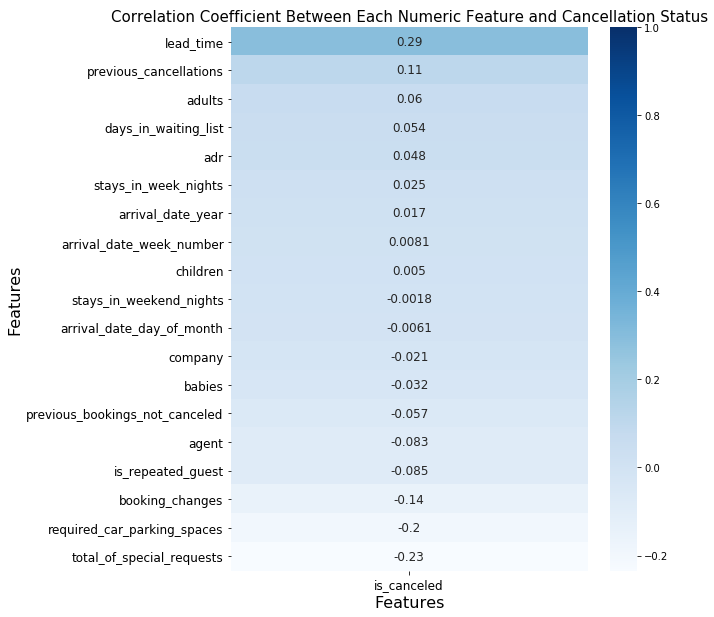

In [50]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=15)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);
plt.savefig('../Assignment3-Hotel Booking/assets/corr_coefficient.png')

- highest positive correlations : `lead_time` followed by `previous_cancellations`
- highest negative correlations : `total_of_special_requests`, `required_car_parking_spaces`

Cancellations in resort hotel=  0.27763354967548676
Cancellations in city hotel=  0.41726963317786464


Text(0.5, 1.0, 'Total count of bookings and cancellations per hotel')

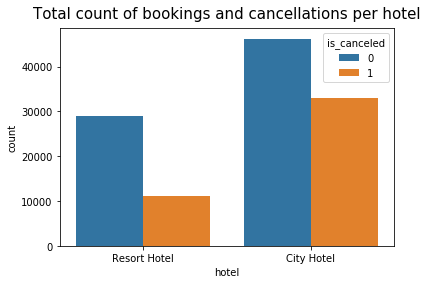

In [11]:
sns.countplot(data = data, x = 'hotel', hue = 'is_canceled')

resort_canceled = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 1)]
city_canceled = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 1)]

print('Cancellations in resort hotel= ', (len(resort_canceled)) / (len(data[data['hotel'] == 'Resort Hotel'])))
print('Cancellations in city hotel= ', (len(city_canceled)) / (len(data[data['hotel'] == 'City Hotel'])))

plt.title("Total count of bookings and cancellations per hotel", fontsize = 15, pad = 10)

Our 1st assumption, city hotels have higher cancellation rate than resort hotels, is valid. (reasons for cancellations for city hotel)

In [12]:
print(len(data[(data['stays_in_weekend_nights'] == 0) & (data['stays_in_week_nights'] == 0)])) 

715


**`715`** bookings don't have both weekday or weekend nights which could be an error in the data as this is not possible in real life scenario. Therefore these rows can be eliminated from the dataset.

In [13]:
((len(data.loc[(data['children'] != 0) | (data['babies'] != 0)]))/(len(data))) * 100

7.819750397855767

The number of customers having children or babies or both are only **`8.00%`** (7.81% precisely) of the total population. Therefore this information can be ignored as it will not play a significant role in deciding whether to cancel the booking or not. **Assumption 4 can be discarded.**

Cancelations among new guests=  0.3778508392455442
Cancelations among old guests=  0.14488188976377953


Text(0.5, 1.0, 'Total count of is repeated guest')

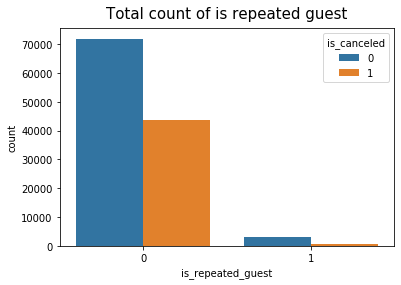

In [14]:
sns.countplot(data = data, x ='is_repeated_guest', hue ='is_canceled')

new_guest = data[(data['is_repeated_guest'] == 0) & (data['is_canceled']==1)]
old_guest = data[(data['is_repeated_guest'] == 1) & (data['is_canceled']==1)]

print('Cancelations among new guests= ', (len(new_guest)) / (len(data[data['is_repeated_guest'] == 0])))
print('Cancelations among old guests= ', (len(old_guest)) / (len(data[data['is_repeated_guest'] == 1])))

plt.title("Total count of is repeated guest", fontsize = 15, pad = 10)

As seen in the correlation table, the above graph is the evidence that maximum customers are new comers and they are less likely to cancel their current booking. Old guests are less likely to cancel the booking (**14%**). **Assumption 5 holds true**.

Text(0.5, 1.0, 'Total count of previous cancellations')

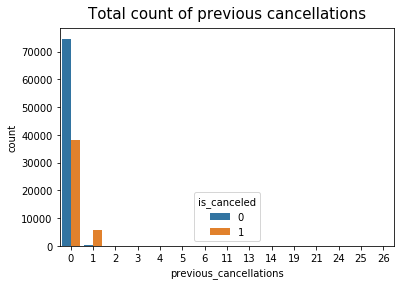

In [15]:
sns.countplot(data = data, x='previous_cancellations', hue='is_canceled')
plt.title("Total count of previous cancellations", fontsize = 15, pad = 10)

Maximum customers have 0 previous cancellations. They are less likely to cancel the current booking. However, customers who have cancelled once earlier are more likely to cancel the current booking. **This also matches with the positive correlation between `previous_cancellations` and `is_cancelled` and supports Assumption 6**.

In [16]:
temp = data.loc[data['reserved_room_type'] != data['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True) * 100

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

**Assumption 7** that there more cancellations when assigned room type is different from reserved room type **is not valid**. There are only 5% cancellations in such a case.

Text(0.5, 1.0, 'Booking Changes VS Cancellations')

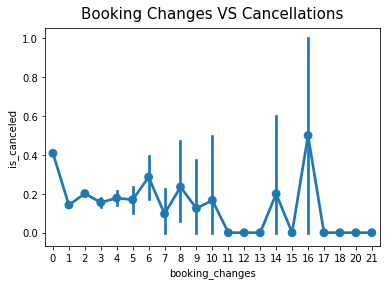

In [17]:
sns.pointplot(data = data, x = 'booking_changes', y = 'is_canceled')
plt.title("Booking Changes VS Cancellations", fontsize = 15, pad = 10)

**Assumption 8** about the bookings **does not hold** as there is no trend in it's impact on the cancellation of bookings.

Text(0.5, 1.0, 'Cancellation VS Deposit type')

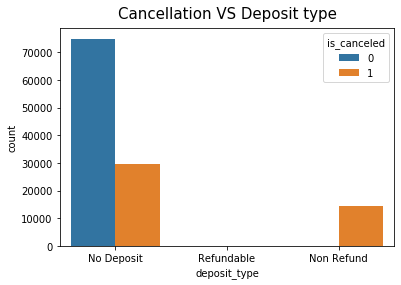

In [18]:
sns.countplot(x = "deposit_type", hue = "is_canceled", data = data);
plt.title("Cancellation VS Deposit type", fontsize = 15, pad = 10)

**Contrary to assumption 9, bookings that are `non_refundable` are canceled.**

Text(0.5, 1, 'Days in waiting VS cancellations')

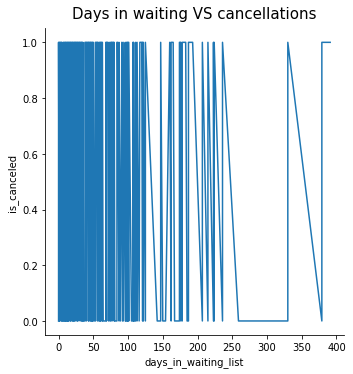

In [19]:
sns.relplot(data = data, x ='days_in_waiting_list', y = 'is_canceled', kind = 'line', estimator = None)
plt.title("Days in waiting VS cancellations", fontsize = 15, pad = 10)

No relation can be established between `days_in_waiting_list` and `is_canceled`. Therefore, we will take this feature for further analysis.

**Assumption 10 can be discarded.**

In [20]:
year_cancellations = data.groupby(['arrival_date_year'])['is_canceled'].sum()
year_cancellations

arrival_date_year
2015     8142
2016    20337
2017    15745
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Total number of bookings per year')

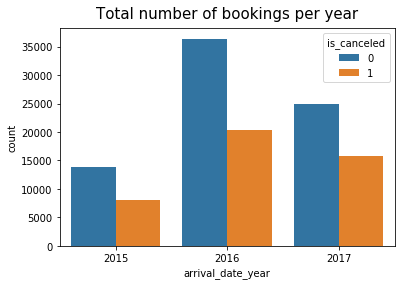

In [21]:
sns.countplot(data = data, x = 'arrival_date_year', hue = 'is_canceled')
plt.title("Total number of bookings per year", fontsize = 15, pad = 10)

In [22]:
max_bookings = data.groupby(['arrival_date_month'])['is_canceled'].count().sort_values(ascending = False)
print(max_bookings)

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: is_canceled, dtype: int64


Text(0.5, 1, 'Total Number of bookings per month')

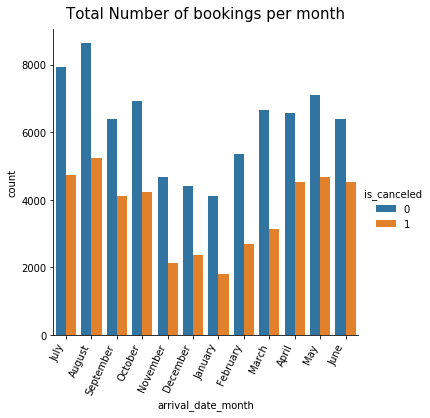

In [23]:
chart = sns.catplot(data = data, x = 'arrival_date_month', hue = 'is_canceled', kind = 'count')
chart.set_xticklabels(rotation = 65, horizontalalignment = 'right')
plt.title("Total Number of bookings per month", fontsize = 15, pad = 10)

Maximum bookings in the year 2016 were in the months of July and August.

In [24]:
year_count = data.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name = 'count')
year_perct = year_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(year_perct)
# year_perct_chart = sns.catplot(data = data, x='arrival_date_year', hue='is_canceled', kind='count')
# year_perct_chart.set_xticklabels(rotation = 0, horizontalalignment = 'right')

month_count = data.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name = 'count')
month_perct = month_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(month_perct)
# month_perct.plot(kind='bar')

                                   count
arrival_date_year is_canceled           
2015              0            62.984179
                  1            37.015821
2016              0            64.136703
                  1            35.863297
2017              0            61.302136
                  1            38.697864
                                    count
arrival_date_month is_canceled           
April              0            59.202814
                   1            40.797186
August             0            62.246883
                   1            37.753117
December           0            65.029499
                   1            34.970501
February           0            66.584036
                   1            33.415964
January            0            69.522685
                   1            30.477315
July               0            62.546402
                   1            37.453598
June               0            58.542828
                   1            41.457172


Percentage of cancellations was higher in 2015 and 2017 despite higher number of bookings in 2016. April and June had the largest cancellations overall.

Text(0.5, 1, 'Total cancellations acorss market segment')

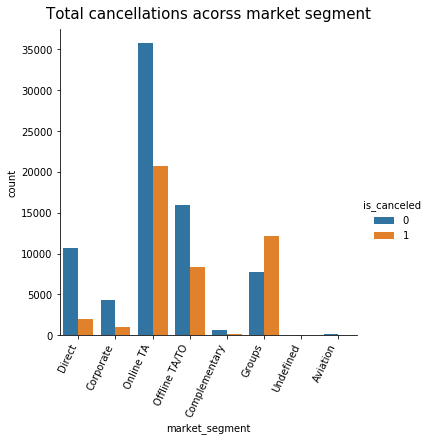

In [25]:
chart = sns.catplot(data = data, x = 'market_segment', kind = 'count', hue = 'is_canceled')
chart.set_xticklabels(rotation = 65, horizontalalignment = 'right')
plt.title("Total cancellations acorss market segment", fontsize = 15, pad = 10)

Text(0.5, 1.0, 'Distribution of cancellations in various channels')

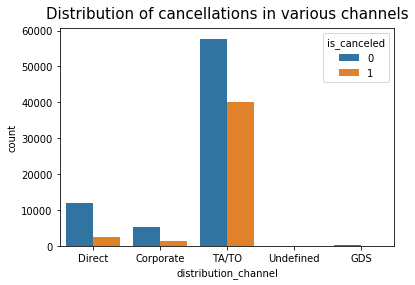

In [26]:
sns.countplot(data = data, x = 'distribution_channel', hue = 'is_canceled')
plt.title("Distribution of cancellations in various channels", fontsize = 15, pad = 10)

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64


Text(0.5, 1.0, 'Average Number of cancellations in each category')

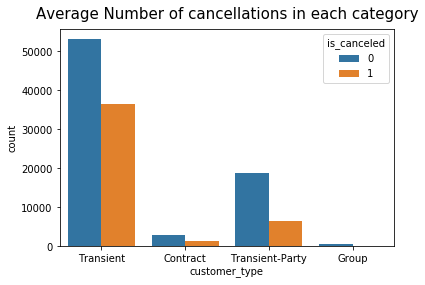

In [27]:
print(data['customer_type'].value_counts(normalize = True) * 100)
sns.countplot(data = data, x = 'customer_type', hue = 'is_canceled')
plt.title("Average Number of cancellations in each category", fontsize = 15, pad = 10)

75% bookings occur in Transient category of customers. It also sees the highest cancellation among all the categories.

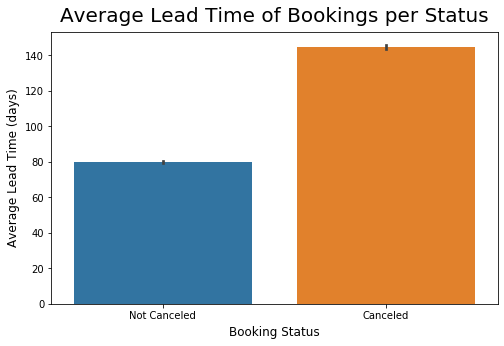

In [51]:
# Visualizing the average lead time for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['lead_time'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);
plt.savefig('../Assignment3-Hotel Booking/assets/lead_time_booking_per_status.png')

Maximum cancellations occur if the booking is made 60-70 days before the check-in date. Longer the lead_time, lower is the cancellation. This invalidates our 2nd assumption.

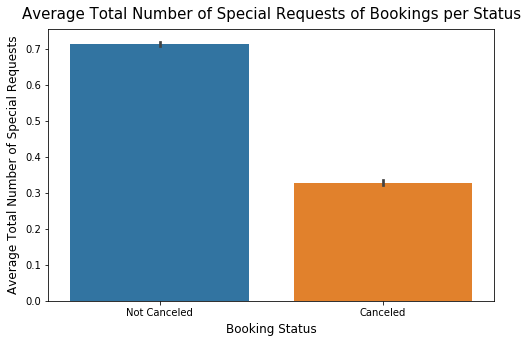

In [52]:
# Visualizing the total number of special requests for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Total Number of Special Requests of Bookings per Status", fontsize = 15, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['total_of_special_requests'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Total Number of Special Requests", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);
plt.savefig('../Assignment3-Hotel Booking/assets/total_special_requests.png')

**Interpretation:** Customers who cancel their bookings make on average fewer special requests. Potential reasons why were discussed above.

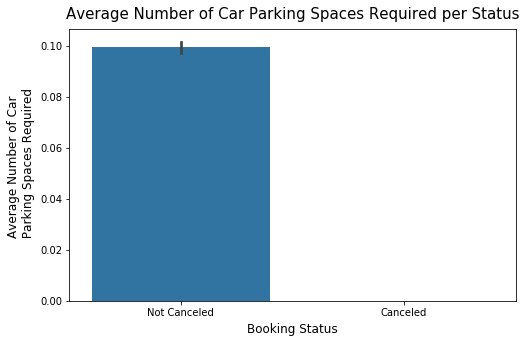

In [53]:
# Visualizing the total number of requested parking spaces for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Car Parking Spaces Required per Status", fontsize = 15, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['required_car_parking_spaces'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Car \n Parking Spaces Required", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);
plt.savefig('../Assignment3-Hotel Booking/assets/parking_space_required.png')

**Interpretation:** On average, customers who do not cancel their bookings tend to require more parking spaces. Similarly to the number of special requests, it would make sense that the more a customer engages with the hotel (by putting in a request for a parking spot), the less likely they are to cancel. It is also fair to think that by the time a guest is thinking about where they will park their car, they are most likely pretty commited to their destination. Finally, thinking about this from the hotel perpective, it is possible that not many hotels around have a parking. As a result, the need for a parking space would limit the customer in their hotel options and make them less likely to cancel. More information would be required from the hotel directly to confirm this theory. However, if true, this suggests that adding parking spaces could be a way to help reduce cancellations.

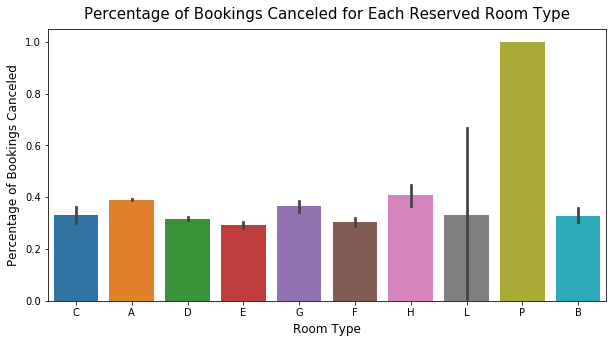

In [31]:
# Visualizing percentage of bookings canceled for each room type:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Reserved Room Type", fontsize = 15, pad = 10)
sns.barplot(x=data['reserved_room_type'], y=data['is_canceled'])
plt.xlabel("Room Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

**Interpretation:** 

Customers who reserved room type P have the highest percentage booking cancellation with 100% of bookings canceled. As the dataset did not provide the actual room designations for anonymity purposes, it is hard to interpret why bookings of room type P are canceled more often.

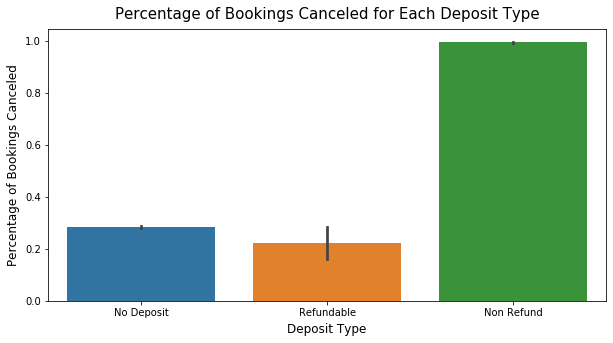

In [54]:
# Visualizing percentage of bookings canceled for each deposit type:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Deposit Type", fontsize = 15, pad = 10)
sns.barplot(x=data['deposit_type'], y=data['is_canceled'])
plt.xlabel("Deposit Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);
plt.savefig('../Assignment3-Hotel Booking/assets/deposit_type_bookings_cancelled.png')

**Interpretation:** 

Surprisingly, customers who pay a non-refundable deposit have a much higher percentage of canceled reservations. As this is a counter-intuitive finding, it is necessary to dig a little deeper into the characteristics of bookings with a non-refundable deposit.

In [33]:
data['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

### Multivariate Analysis

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


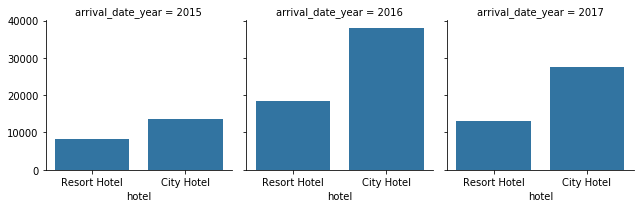

In [34]:
grid = sns.FacetGrid(data, col='arrival_date_year')
grid.map(sns.countplot, 'hotel')

In all three years city hotels saw more bookings than resort hotels.

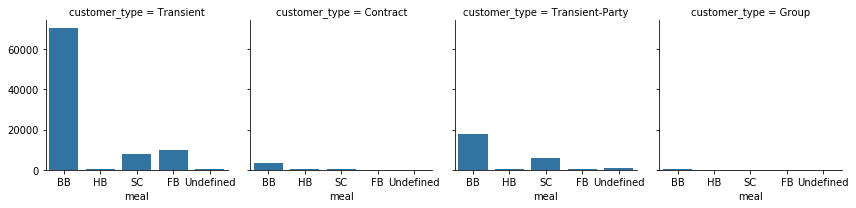

In [35]:
data['meal'].nunique(), data['customer_type'].nunique()
grid = sns.FacetGrid(data, col = 'customer_type')
grid.map(sns.countplot, 'meal')

Mainly all kinds of customers prefer BB type meals.

In [36]:
data.pivot_table(columns='hotel', values='country', aggfunc=lambda x:x.mode())

hotel,City Hotel,Resort Hotel
country,PRT,PRT


People from country with ISO code 'PRT' made the most number of bookings in both types of hotels.

Text(0.5, 1.0, 'Reversed room type booked VS Hotel')

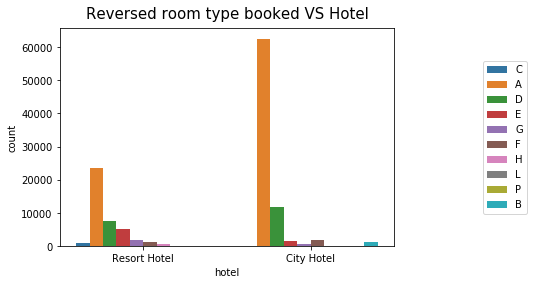

In [37]:
g = sns.countplot(data = data, x = 'hotel', hue = 'reserved_room_type')
g.legend(loc = 'center left', bbox_to_anchor = (1.25, 0.5), ncol = 1)
plt.title("Reversed room type booked VS Hotel", fontsize = 15, pad = 10)

- Resort hotels room preference : A, D, E
- City hotels room preference : A, D, F

In [38]:
print("TABLE 1")
print(data.groupby(['hotel', 'customer_type']).size())

TABLE 1
hotel         customer_type  
City Hotel    Contract            2300
              Group                293
              Transient          59404
              Transient-Party    17333
Resort Hotel  Contract            1776
              Group                284
              Transient          30209
              Transient-Party     7791
dtype: int64


For each kind of hotel, 

- Transient type of customers are the highest 
- followed by Transient Party
- Group bookings are the least

In [39]:
print(data.groupby(['customer_type', 'deposit_type']).size())

customer_type    deposit_type
Contract         No Deposit       3530
                 Non Refund        544
                 Refundable          2
Group            No Deposit        569
                 Refundable          8
Transient        No Deposit      76684
                 Non Refund      12909
                 Refundable         20
Transient-Party  No Deposit      23858
                 Non Refund       1134
                 Refundable        132
dtype: int64


Each category of customers book hotels without deposit. Surprisingly, between refundable and non-refundable type, **higher number of people book hotels that are non-refundable**.

In [40]:
print(data.groupby(['customer_type', 'distribution_channel']).size())

customer_type    distribution_channel
Contract         Corporate                  27
                 Direct                     19
                 TA/TO                    4030
Group            Corporate                  31
                 Direct                    116
                 TA/TO                     430
Transient        Corporate                4157
                 Direct                  12343
                 GDS                       193
                 TA/TO                   72919
                 Undefined                   1
Transient-Party  Corporate                2462
                 Direct                   2167
                 TA/TO                   20491
                 Undefined                   4
dtype: int64


In [41]:
print(data.groupby(['customer_type', 'market_segment']).size())

customer_type    market_segment
Contract         Complementary         2
                 Corporate            22
                 Direct               14
                 Groups              735
                 Offline TA/TO      1817
                 Online TA          1486
Group            Aviation              2
                 Complementary         6
                 Corporate            29
                 Direct              134
                 Groups               16
                 Offline TA/TO       211
                 Online TA           179
Transient        Aviation            218
                 Complementary       703
                 Corporate          3576
                 Direct            11336
                 Groups             8427
                 Offline TA/TO     14054
                 Online TA         51299
Transient-Party  Aviation             17
                 Complementary        32
                 Corporate          1668
                 Direct  

In [42]:
print(data.groupby(['hotel', 'distribution_channel']).size())

hotel         distribution_channel
City Hotel    Corporate                3408
              Direct                   6780
              GDS                       193
              TA/TO                   68945
              Undefined                   4
Resort Hotel  Corporate                3269
              Direct                   7865
              TA/TO                   28925
              Undefined                   1
dtype: int64


In [43]:
print(data.groupby(['hotel', 'market_segment']).size())

hotel         market_segment
City Hotel    Aviation            237
              Complementary       542
              Corporate          2986
              Direct             6093
              Groups            13975
              Offline TA/TO     16747
              Online TA         38748
              Undefined             2
Resort Hotel  Complementary       201
              Corporate          2309
              Direct             6513
              Groups             5836
              Offline TA/TO      7472
              Online TA         17729
dtype: int64


Combining table 1 and above table, we see the relation between freqeunt customer types at each hotel and their mode of booking. This information can be used by the hotel to focus on customized publicity strategies. Similarly, the market segments can be analyzed for a more customer centric approach. Hotel type with distribution channel and market segment can also be analyzed.

In [44]:
group = data.groupby(['customer_type', 'reservation_status']).size()
group_pcts = group.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
group_pcts

customer_type    reservation_status
Contract         Canceled              30.323847
                 Check-Out             69.038273
                 No-Show                0.637880
Group            Canceled               9.532062
                 Check-Out             89.774697
                 No-Show                0.693241
Transient        Canceled              39.678395
                 Check-Out             59.253680
                 No-Show                1.067925
Transient-Party  Canceled              24.554211
                 Check-Out             74.570132
                 No-Show                0.875657
dtype: float64

In [45]:
data.pivot_table(columns = 'hotel', values = ['stays_in_weekend_nights', 'stays_in_week_nights'], aggfunc = lambda x:x.sum())

hotel,City Hotel,Resort Hotel
stays_in_week_nights,173174,125337
stays_in_weekend_nights,63082,47664


In [46]:
data.pivot_table(columns = 'hotel', values = 'total_of_special_requests', aggfunc = lambda x:x.sum())

hotel,City Hotel,Resort Hotel
total_of_special_requests,43387,24828


KeyboardInterrupt: 

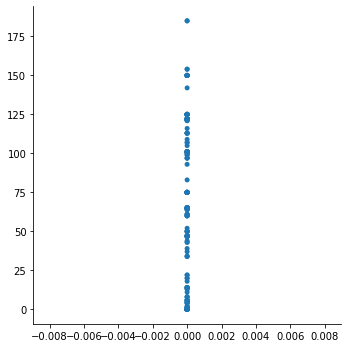

In [47]:
sns.catplot(data = data, x = 'hotel', y = 'days_in_waiting_list', jitter = False)
plt.title("Days in waiting VS Hotel", fontsize = 15, pad = 10)

As it is seen, city hotels have much larger waiting time in days compared to resort hotels which may signify that their demand is higher.

In [ ]:
data['country'].value_counts(normalize = True) * 100

In [ ]:
temp = data.loc[(data['country'] == 'PRT') | (data['country'] == 'GBR') | (data['country'] == 'FRA') | (data['country'] == 'ESP') | (data['country'] == 'DEU')]
grid = sns.FacetGrid(temp, col = 'country')
grid.map(sns.countplot, 'distribution_channel')

Using this information hotels can implement models of publicity for getting more bookings in the top 5 countries from where most of their customers fall.

In [ ]:
sns.barplot(data = data, x = 'customer_type', y = 'total_of_special_requests', ci = None)
plt.title("Total Number of Special Requests of Bookings per customer type", fontsize = 15, pad = 10)

In [ ]:
sns.boxplot(data=data, x='distribution_channel', y='lead_time')
plt.title("Average lead time per distribution channel", fontsize = 15, pad = 10)

In [ ]:
data.describe()

## Feature Engineering

In [ ]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
data.arrival_date_month = data.arrival_date_month.map(month_map).astype(int)

In [ ]:
data['arrival_date'] = data['arrival_date_year'].astype(str)+'-'+data['arrival_date_month'].astype(str)+'-'+data['arrival_date_day_of_month'].astype(str)

In [ ]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

data['change_in_room'] = data.apply(roomChange, axis=1)

In [ ]:
data['children'] = data['children'].fillna(0)
data['offspring'] = (data['children'] + data['babies']).astype(int)

In [ ]:
data['total_bookings'] = data['previous_cancellations'] + data['previous_bookings_not_canceled']

In [ ]:
data['country'].fillna(data['country'].mode()[0], inplace = True)
data['agent'].fillna(data['agent'].mode()[0], inplace = True)
data['company'].fillna(data['company'].mode()[0], inplace = True)

In [ ]:
for i in range(len(data)):
    if data.loc[i, 'country'] == 'PRT':
        data.at[i, 'country'] = 1
    elif data.loc[i, 'country'] == 'GBR':
        data.at[i, 'country'] = 2
    else:
        data.at[i, 'country'] = 0

In [ ]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

In [ ]:
data['stay_duration'] = data['reservation_status_date'] - data['arrival_date']
data['stay_duration'] = data['stay_duration'] / np.timedelta64(1, 'D')
data['stay_duration'] = data['stay_duration'].astype(int)

In [ ]:
for i in range(len(data)):
    if data.loc[i, 'stay_duration'] < 0:
        data.at[i, 'stay_duration'] = -1

In [ ]:
data.columns

In [ ]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    data[item] = lb.fit_transform(data[item])

In [ ]:
data = pd.get_dummies(data, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [ ]:
data.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date'], axis = 1, inplace = True)

### Preparations

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.dummy import DummyClassifier

### Separate features and predicted values

In [ ]:
# Separate features and predicted value
X = data.drop(columns=['is_canceled'], axis=1)
y = data['is_canceled']

### Train-test split

Lets divide the data into training and validation sets:

In [ ]:
# 70 % for training, 30 % for validation

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size = 0.7, test_size = 0.15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

### Scaling 

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

### Prediction using various models

#### Baseline Model

In [ ]:
# Checking baseline model score 
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print(f'Baseline Training Score: {dummy.score(X_train, y_train)}')
print(f'Baseline Testing Score: {dummy.score(X_test, y_test)}')

#### Logistic Regression

In [ ]:
# Construct Grid Parameters
lg_params = {
    'penalty': ['l1'], 
    'C': [3.5],
    'max_iter': [300]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), lg_params, cv = 5, scoring = 'accuracy')
lg = lg_gs.fit(X_train, y_train)

In [ ]:
# Scoring 
print(f'Best Training Accuracy: {lg.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {lg.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(lg.best_estimator_, X, y, cv=StratifiedKFold(shuffle=True)).mean()}')

In [ ]:
#Logistic Regression

logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
confusion_matrix(y_test, logreg_pred)

#### Decision Tree Classifier

In [ ]:
#Decision Tree

tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv = 5)
tree_pred = tree.predict(X_test)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

#### Random Forest Classifier

In [ ]:
#Random Forest

rforest= RandomForestClassifier(random_state = 0, n_jobs = -1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv = 5)
rforest_pred = rforest.predict(X_test)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rforest_pred)))
print(confusion_matrix(y_test, rforest_pred))

#### Adaboost Boosted Classifier

In [ ]:
#Adaboost Classifier
ada = AdaBoostClassifier().fit(X_train, y_train)
ada_pred = ada.predict(X_test)
scores = cross_val_score(ada, X_train, y_train, cv = 5)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(ada.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, ada_pred)))
print(confusion_matrix(y_test, ada_pred))

In [ ]:
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))

def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train, y_train)
    X_train_select = select_features.transform(X_train)
    X_test_select = select_features.transform(X_test)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train, X_test, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)

In [ ]:
#Random Forest
param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)

In [ ]:
#Gradient Boosted Classifier
param_grid = {'max_depth':[1,2,5], 'learning_rate':[1,0.1,0.001]}
run_model(GradientBoostingClassifier(), GradientBoostingClassifier(learning_rate=0.001), param_grid)